<a href="https://colab.research.google.com/github/sai-veni16/FMML-LABS2/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=97929ca0f7348aa98da8d774a229f2382f01ba5b8baa5305d969e42f52a6ba27
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [3]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [5]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [6]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [7]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

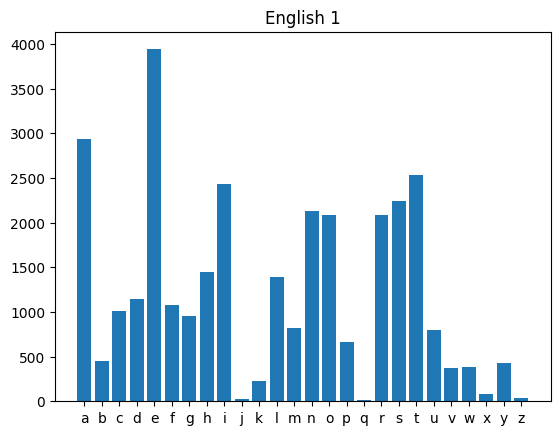

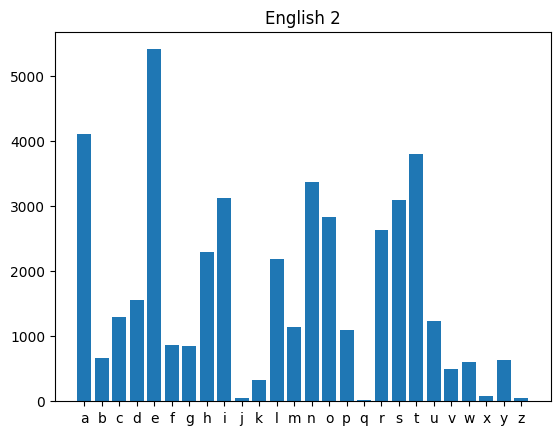

In [8]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

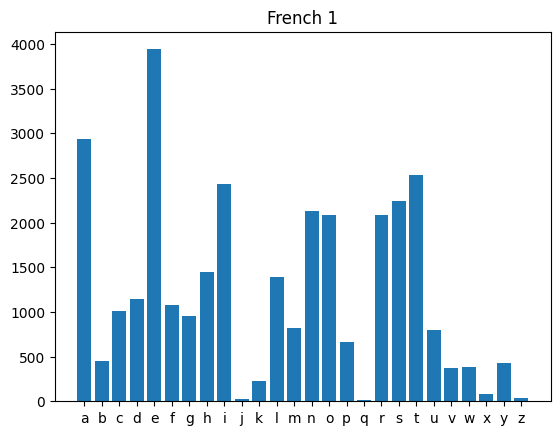

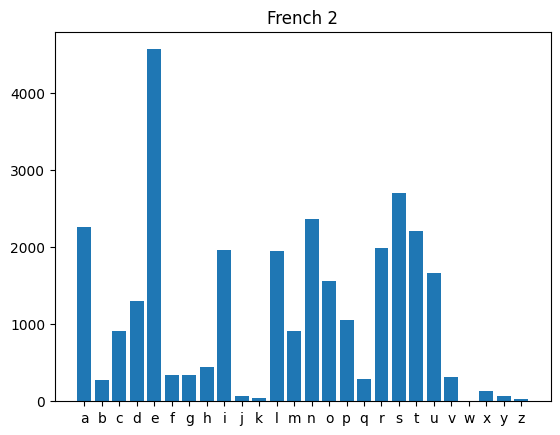

In [9]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

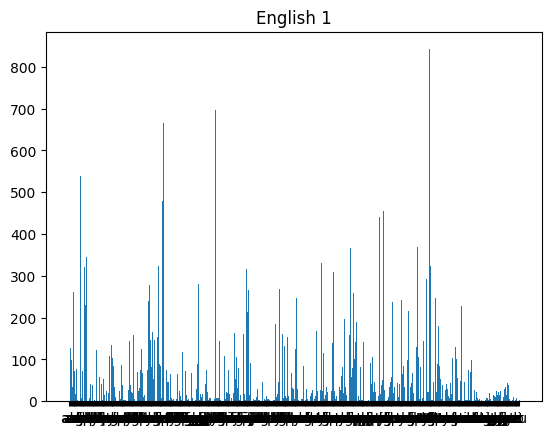

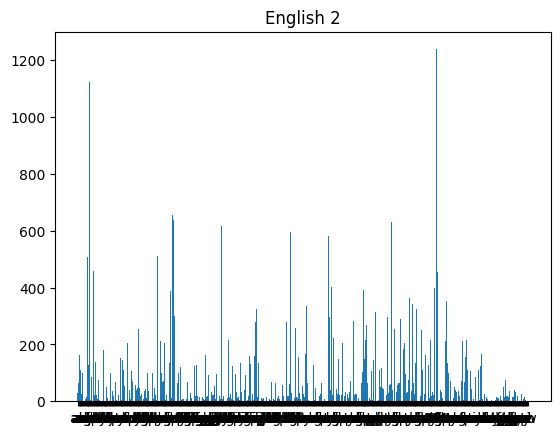

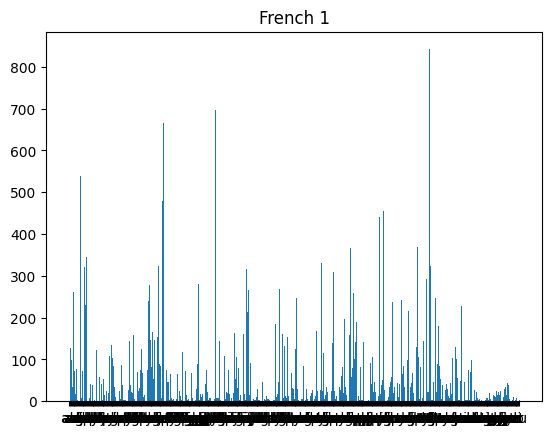

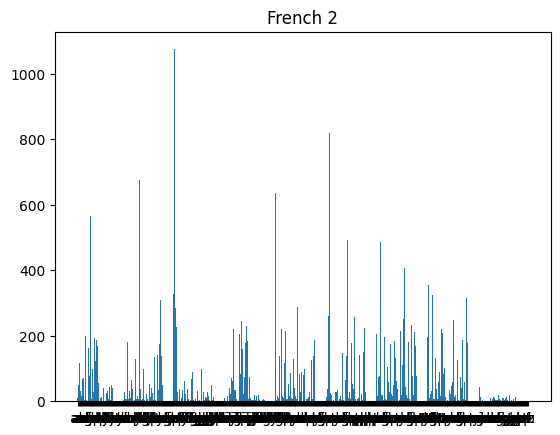

In [10]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [11]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

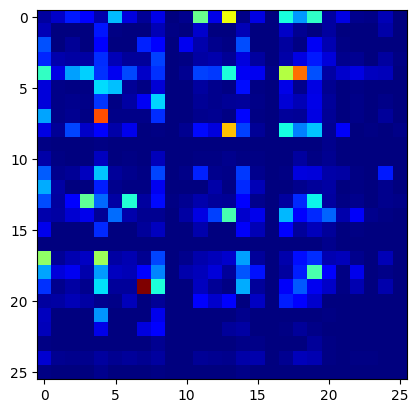

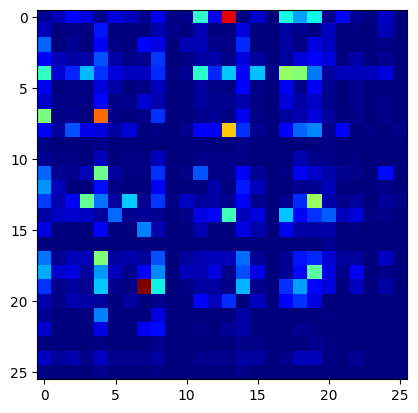

In [12]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

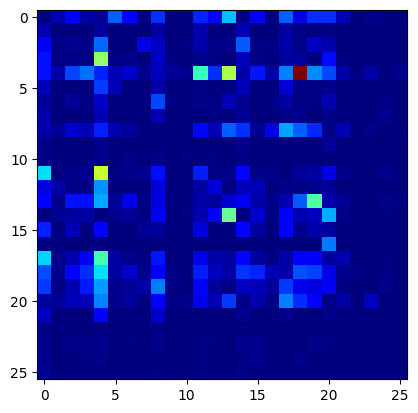

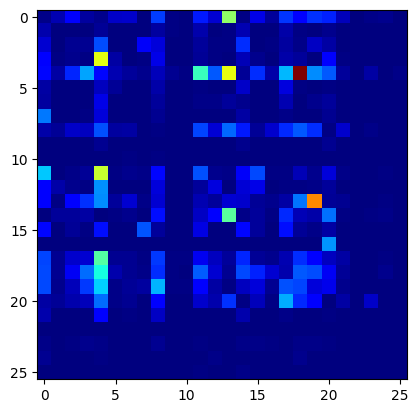

In [13]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [14]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [15]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [16]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [17]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

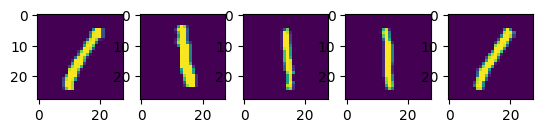

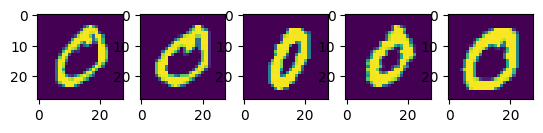

In [18]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [19]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

NameError: ignored

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

In [20]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

NameError: ignored

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

NameError: ignored

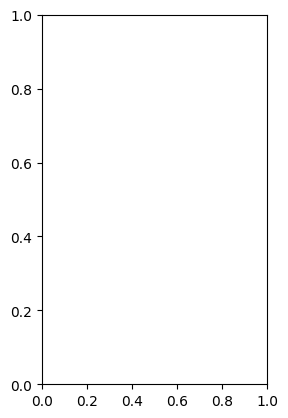

In [21]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

In [22]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

NameError: ignored

What will happen if we plot two features together?

In [23]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

NameError: ignored

Now let us try plotting 3 features together.

In [24]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

NameError: ignored

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

Relevance to the Problem: Features should be relevant to the problem you're trying to solve. Features that do not carry meaningful information about the target variable should be removed.

Redundancy: Avoid including highly correlated features, as they can introduce multicollinearity issues and make the model less interpretable.

Dimensionality: High-dimensional data can lead to overfitting and increased computational complexity. Feature selection or dimensionality reduction techniques like Principal Component Analysis (PCA) can help.

Domain Knowledge: Incorporate domain knowledge whenever possible. Subject-matter experts may provide valuable insights into which features are likely to be important.

Feature Importance: You can use feature importance scores from machine learning algorithms like decision trees or random forests to rank features. This can help you identify the most influential features.

Feature Engineering: Sometimes, creating new features or transforming existing ones can improve model performance. This might involve combining features, scaling, or applying mathematical functions.

Regularization: Techniques like L1 regularization (Lasso) can automatically select important features while setting others to zero.

Cross-Validation: Use cross-validation to assess the performance of different feature combinations. This helps you avoid overfitting and gives you an idea of how well your model generalizes.

Iterative Process: Feature selection is often an iterative process. You can start with a set of features, build models, evaluate performance, and then adjust the feature set based on the results.

Ensemble Methods: Some ensemble methods like Random Forests can handle a large number of features and provide insights into feature importance.

Feature Scaling: Ensure that features are on a similar scale, especially when using distance-based algorithms like k-Nearest Neighbors or clustering methods.

Pairwise Scatter Plots (Matrix Scatter Plot):

Create a matrix of scatter plots, where each combination of two features is plotted against each other. If you have four features, this would result in six scatter plots. Use color or shape to represent the values of a fifth or sixth feature if necessary.
Libraries like Seaborn in Python make it relatively easy to create pair plots.
Parallel Coordinates Plot:

This plot is suitable for visualizing multivariate data. Each feature is represented as a vertical axis, and lines connect data points based on their values for each feature. Patterns in the lines can reveal relationships between the features.
You can use libraries like Matplotlib or specialized packages like plotly to create parallel coordinates plots.
3D Scatter Plots with Color Mapping:

If you have four features and a target variable (e.g., classification labels or regression values), you can create a 3D scatter plot where three features define the x, y, and z coordinates, and the fourth feature can be represented using color or size of the markers.
Matplotlib and Plotly can help create 3D scatter plots.
Ternary Plots or Triangle Plots:

If your features are constrained to sum to a constant (e.g., three chemical components that sum to 100%), you can use ternary plots. Each point inside the triangle represents a combination of the three features, and the position within the triangle indicates the relative proportions.
You can use libraries like matplotlib-ternary in Python to create ternary plots.
Dimensionality Reduction:

Techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) can reduce the dimensionality of your data while preserving important information. You can visualize the data in a lower-dimensional space (e.g., 2D or 3D) after applying these methods.
Heatmaps and Correlation Matrices:

Create a heatmap of the correlation matrix between all features. This can help identify patterns and relationships between features, especially if some are highly correlated.
Python libraries like Seaborn and Matplotlib are commonly used for creating heatmaps.
Interactive Visualizations:

Interactive visualizations can be very useful for exploring high-dimensional data. Tools like Plotly, Bokeh, or Tableau allow you to create interactive plots where you can zoom, pan, and highlight data points to gain insights.

Polynomial Features: You can generate polynomial features by raising existing features to different powers (e.g., squaring or cubing them). This can capture nonlinear relationships between features and the target variable.

Interactions: Create interaction features by combining two or more existing features. For example, if you have features for length and width, you can create a new feature representing area by multiplying these two features.

Aggregations: Compute summary statistics like mean, median, minimum, maximum, or standard deviation for groups of data points based on a categorical feature. This can be useful for turning time-series data or categorical data into meaningful numeric features.

Time-Based Features: If you're working with time-series data, you can extract various time-related features such as day of the week, month, season, or time elapsed since a specific event.

Text-Based Features: When dealing with text data, you can engineer features such as word counts, character counts, TF-IDF scores, or sentiment scores to represent the text content.

Encoding Categorical Variables: Convert categorical variables into numerical format using techniques like one-hot encoding, label encoding, or target encoding.

Binning or Discretization: Group numerical values into bins or categories. For example, you can convert age into age groups (e.g., "child," "teen," "adult," "senior").

Domain-Specific Features: Leverage domain knowledge to create features that are specific to your problem. These features may not be immediately apparent in the raw data but can capture important patterns or relationships.

Geospatial Features: If working with geospatial data, you can engineer features like distances between locations, clustering of data points, or geospatial statistics.

Combining Features: Combine multiple features in creative ways to create composite features that may capture complex relationships in the data.

Feature Scaling and Normalization: Standardize or normalize features to bring them to a common scale. This can be important for algorithms sensitive to feature scales, like many machine learning algorithms.

Feature Selection: While this involves choosing the most relevant features rather than creating new ones, it's still an essential part of feature engineering. Techniques like Recursive Feature Elimination (RFE) can help identify the most informative features

Increased Complexity: Multi-class classification is inherently more complex than binary classification because there are multiple classes to consider. The model must learn to differentiate between all the available classes, not just two.

Class Imbalance: Class imbalance is often more pronounced in multi-class problems, as some classes may have more instances than others. This can affect model training and evaluation, and you may need to address class imbalance with techniques like over-sampling, under-sampling, or class-weighted models.

Classification Algorithms: Many classification algorithms can naturally handle multi-class problems, including decision trees, random forests, support vector machines, and neural networks. These algorithms can be used directly without modification.

One-vs-All (OvA) or One-vs-One (OvO): Some algorithms, like logistic regression or binary support vector machines, need adaptations to handle multi-class problems. Common approaches include OvA (also known as one-hot encoding) and OvO, where multiple binary classifiers are trained to distinguish between pairs of classes.

Evaluation Metrics: In multi-class classification, you'll use different evaluation metrics than in binary classification. Common metrics include accuracy, precision, recall, F1-score, confusion matrices, and multi-class log-loss (cross-entropy).

Output Probability Distribution: For each data point, multi-class models output a probability distribution over all classes. The class with the highest probability is the predicted class. This allows you to assess model confidence and explore class probabilities for uncertainty estimation.

Visualization Challenges: Visualizing the performance and results of multi-class classification can be more challenging than binary classification. Techniques like confusion matrices can help, and dimensionality reduction can aid in visualization.

Feature Engineering: Feature engineering and data preprocessing remain essential, but you might need to consider how different features relate to multiple classes simultaneously. Feature engineering can involve creating new features that capture multi-class relationships.

Cross-Validation: Cross-validation is crucial for assessing the model's performance in a multi-class setting. Techniques like k-fold cross-validation should be used to ensure robust evaluation.

Hyperparameter Tuning: Tuning hyperparameters is an important step, and you may need to optimize the model parameters to achieve the best performance.

Multi-Class Labels: Ensure that your target variable has multiple classes (more than just 0 and 1) representing different categories or labels. Multi-class classification problems involve classifying data points into one of several possible classes.

Feature Engineering Principles: The principles of feature engineering remain the same regardless of the number of classes. You can create new features, transform existing ones, and preprocess the data to better capture relationships and patterns that help distinguish between different classes.

Encoding Multi-Class Labels: You may need to encode your multi-class labels appropriately. Common encoding methods include one-hot encoding (creating binary columns for each class), label encoding (assigning a unique integer to each class), or ordinal encoding (if classes have a natural order).

Feature Importance and Interpretation: When working with multiple classes, it's still essential to understand which features are most important for distinguishing between the classes. You can use techniques like feature importance scores from random forests or gradient boosting models to assess feature importance.

Visualization: Visualizing multi-class data can be more challenging than binary data, but techniques such as dimensionality reduction (e.g., PCA or t-SNE) can help you visualize the data in a lower-dimensional space while preserving class information.

Validation and Evaluation: Ensure you use appropriate metrics for evaluating multi-class classification models. Common metrics include accuracy, precision, recall, F1-score, and confusion matrices.

Imbalanced Classes: In multi-class scenarios, you may encounter imbalanced class distributions. Feature engineering can also help address class imbalance by creating informative features or using techniques like Synthetic Minority Over-sampling Technique (SMOTE).

Domain Knowledge: As with any feature engineering task, domain knowledge is valuable for understanding the data and creating features that are relevant to the problem at hand, whether it's multi-class classification or another task.